<a href="https://colab.research.google.com/github/vipindogra/EDA-ON-HOTEL-BOOKING-ANALYSIS/blob/main/Colab_Netflix_Movies_and_TV_Shows_Clustering_refrencepynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix movie and TV show Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Vipin(vipindogra913@gmail.com)

# **Project Summary -**

The goal of this project is to analyze the Netflix Dataset of movies and TV shows till 2019, which was sourced from the third-party search engine Flixable, and group them into relevant clusters, with the help of NLP. This will aid in enhancing the user experience with the help of recommendation system, and this can prevent subscriber churn from the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers. The dataset will also be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

We have followed a step by step process for this project which is as follows:-

1. Firstly, we have dealt with null values/missing values in the dataset.

2. Handled the nested columns in the dataset, which are director, cast, listed_in, and country. This helps in clearly visualizing our analysis.

3. Binning the rating attribute into appropriate categories, such as adult, children's, family-friendly, and not rated content.

4. We performed Exploratory data analysis (EDA) on various attributes and gained insightful findings that will be valuable in preventing subscriber churn.

5. Created cluster using following attributes: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

6. We have reduced the dimension of the project dataset using PCA which is a dimensionality reduction technique used to improve performance, as the resulted sparse matrix was huge with more than 30,000 attributes

7. We have utilized various methods such as the Elbow method, Silhouette score, Dendrogram, and others to construct two distinct types of clusters using K-Means Clustering and Agglomerative Hierarchical Clustering algorithms, respectively. With the help of K-Means clustering analysis, we determined that the optimal number of clusters for our dataset is 4. Using the hierarchical clustering algorithm, we were able to identify 2 clusters.

8. Finally, we have developed a content-based recommender system using the cosine similarity matrix. This system analyzes the type of show a user has watched and generates personalized recommendations for the user, which is expected to improve user experience and reduce subscriber churn for Netflix.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


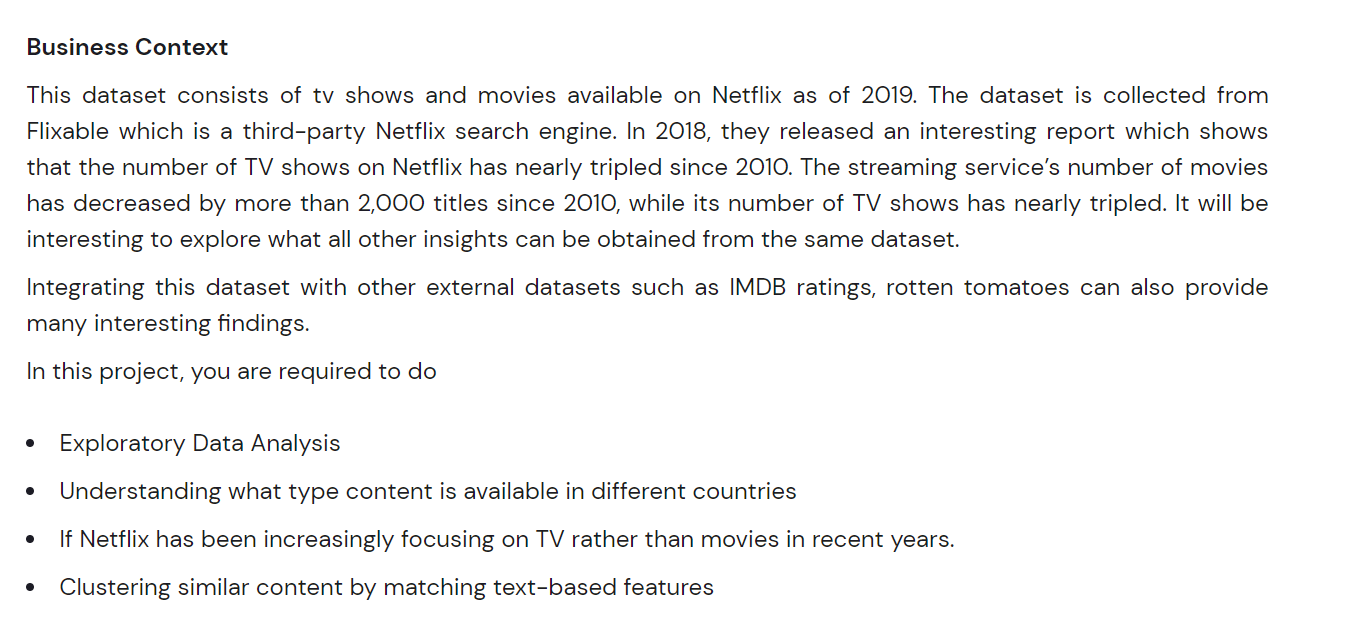





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

### Dataset Loading

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Rows and Column count in the Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")


It's good to see that we do not have any duplicated observation in our dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=df.columns,y=df.isna().sum())
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

### What did you know about your dataset?

The Netflix Movies and TV Shows Clustering Dataset consists of 12 columns, out of which only one column has an integer data type. The dataset does not contain any duplicate values. However, there are null values present in five columns: director, cast, country, date_added, and rating.

This dataset can be useful for exploring trends in the types of movies and TV shows that are available on Netflix, as well as for developing clustering models to group similar titles together based on shared attributes such as genre, country of origin, and rating

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

In [ ]:
# Dataset Describe
df.describe(include='all').T

### Variables Description


The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. show_id: Unique identifier for each movie/show.

2. type: Indicates whether the entry is a movie or a TV show.

3. title: Name of the movie or TV show.

4. director: Name of the director(s) of the movie or TV show.

5. cast: Names of the actors and actresses featured in the movie or TV show.

6. country: Country or countries where the movie or TV show was produced.

7. date_added: Date when the movie or TV show was added to Netflix.

8. release_year: Year when the movie or TV show was released.

9. rating: TV rating or movie rating of the movie or TV show.

10. duration: Length of the movie or TV show in minutes or seasons.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

In [ ]:
df["date_added"].value_counts()

In [ ]:
df['rating'].value_counts()

In [ ]:
df['country'].value_counts()

1. We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high and we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.

2. We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.

In [ ]:
## Imputing null value as per our discussion
# imputing with unknown in null values of director and cast feature
df[['director','cast']]=df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [ ]:
# Rechecking the Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Rechecking the percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

####2.  Handling nested columns i.e 'director', 'cast', 'listed_in' and 'country'

In [ ]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [ ]:
# Unnesting 'Directors' column
dir_constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

In [ ]:
# Unnesting 'cast' column
cast_constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

In [ ]:
# Unnesting 'listed_in' column
listed_constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)

In [ ]:
# Unnesting 'country' column
country_constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

In [ ]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

In [ ]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df = df7.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head()

####4.  Binning of Rating attribute

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

TV-MA: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

R: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

PG-13: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

TV-14: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

TV-PG: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

NR: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

TV-G: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

TV-Y: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

TV-Y7: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

PG: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

G: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

NC-17: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

TV-Y7-FV: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

UR: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

Let's not complicate it and create bins as following:

. Adult Content: TV-MA, NC-17, R

.Children Content: TV-PG, PG, TV-G, G

.Teen Content: PG-13, TV-14

. Family-friendly Content: TV-Y, TV-Y7, TV-Y7-FV

. Not Rated: NR, UR


In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

In [ ]:
# Checking head after binning
df.head()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Create a DataFrame of the count of each unique value in the 'type' column
type_counts = df['type'].value_counts()
plt.figure(figsize=(7,7))
# Create a pie chart of the 'type' column
plt.pie(type_counts, labels=type_counts.index,colors=['#B7C3F3','#DD7596'],explode=(0, 0.1),shadow=True, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us the percent of TV shows and movie data present on Netflix Data set

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes! the production house should more focus on quality movies because there is high competition in the market.

TV Shows are less in numbers hence good opportunity for business.

#### Chart - 2

In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('Country')[['Country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['Country']
df_heatmap = df.loc[df['Country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['Country'],df_heatmap['rating'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Defining order of representation
country_order = ['United States','India','United Kingdom','Canada','France','Japan','Spain','South Korea','Germany', 'Mexico']
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order,country_order], cmap='Set2', square=True,linewidth=2.5,cbar=False,annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us which countries producing which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

We found that most of the countries produces content related to Adult and Teen.

Amomg all the countries INDIA has less content in Adult segment than teen content.

85% of content is Adult content from spain.

Canada produces more content related to Children and Family-Friendly content.

#### Chart - 3

In [ ]:
df_country = df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "Country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?


To know which country produces Maximum number of TV Shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

The United States is the top country producing both movies and TV shows on Netflix. This suggests that Netflix is heavily influenced by American content.

India is the second-highest producer of movies on Netflix, indicating the growing popularity of Bollywood movies worldwide.

Country like canada, france, japan also have significant presence in the data set showing diversity of content on the netflix

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained can have a positive impact on Netflix's business by highlighting opportunities for growth and expansion, such as investing in American and Bollywood content, and acquiring more diverse content.

#### Chart - 4

In [ ]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  df['duration'] = df.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in df.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert
      # season to total min
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  df.duration = time_list

In [ ]:
df.duration.value_counts().to_frame().T

#### Chart - 5

In [ ]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Chart - 6

In [ ]:
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

#### Chart - 7

In [ ]:
df_movies = df[df['type'] == 'Movie' ]
df_movies.head(2)

Most of the contents got ratings like

TV-MA (For Mature Audiences)

TV-14 ( May be unsuitable for children under 14 )

TV-PG ( Parental Guidance Suggested )

NR ( Not Rate

#### Chart - 8

In [ ]:
df['type'].unique()

In [ ]:
df_tv_show = df[df['type']== 'TV Show' ]
df_tv_show.head(2)

In [ ]:
#Pointplot on top tv show ratings
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

#### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement 1:

* Null Hypothesis: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.
*   Alternative Hypothesis: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

Hypothetical Statement 2:

*  Null Hypothesis: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.   
*   Alternative Hypothesis: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

Hypothetical Statement 3:

*   Null Hypothesis: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.
*   Alternative Hypothesis: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.







#### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

Alternative Hypothesis: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = df[df['Genre'].str.contains('Dramas') | df['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the z-test for proportions.



#### Why did you choose the specific statistical test?

The z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

#### Hypothetical Statement - 2

####  State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

**Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

#### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

**Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.           

#### 6. Feature Engineering & Data Pre-processing

#### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Since we have already dealed with null value. So it is not needed now.
df.isna().sum()

#### 2. Textual Data Preprocessing

In [ ]:
# Here we are taking the copied dataframe as the data having more number of observations resulted in ram exhaustion.
df.shape, df_new.shape

In [ ]:
# Binning of rating in new dataframe
df_new['rating'].replace(rating_map, inplace = True)

# Checking sample after binning
df_new.sample(2)

#### 1. Textual Columns

In [ ]:
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head(5)

#### 2. Lower Casing

In [ ]:
# Lower Casing
df_new['content_detail']= df_new['content_detail'].str.lower()

# Checking the manipulation
df_new.iloc[281,]['content_detail']

#### 3. Removing Punctuations

In [ ]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [ ]:
# Removing Punctuations from the content_detail
df_new['content_detail']= df_new['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

#### 7. ML Model Implementation

#### ML Model - 1 (K-Means Clustering)

K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity of data points. The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid. It works iteratively by assigning each data point to its nearest centroid and then re-computing the centroid of each cluster based on the new assignments. The algorithm terminates when the cluster assignments no longer change or when a maximum number of iterations is reached.

Let's just itterate over a loop of 1 to 16 clusters and try to find the optimal number of clusters with ELBOW method.

#### Conclusions drawn from ML Model

. Implemented K-Means Clustering and Agglomerative Hierarchical Clustering, to cluster the Netflix Movies TV show dataset.

.The optimal number of clusters we are getting from K-means is 4, whereas for Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 2.

. We chose Silhouette Score as the evaluation metric over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.

. Built a Recommendation system that can help Netflix improve user experience and reduce subscriber churn by providing personalized recommendations to users based on their similarity scores.